# Lab 6

Alexander Chkodrov  
11/13/2019  

## Problem 1

Create a background Poisson distribution with mean 100.  
Determine where the 5$\sigma$ sensitivity threshold is

In [13]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [60]:
sigma = 5
thresh = stats.poisson.isf(stats.norm.sf(sigma), mu=100)
print(f"{sigma}𝜎 sensitivity threshold signal strength: {thresh:.1f}")

5𝜎 sensitivity threshold signal strength: 154.0


In [95]:
signal = 298
sigma = stats.norm.isf(stats.poisson.sf(signal, mu=100))
print(f"Signal strength {signal} has probability {sigma:.1f}𝜎")

Signal strength 298 has probability 16.0𝜎


## Problem 2

Create a simulated signal of a single strength of strength somewhere between 8𝜎 and 30𝜎. Insert it many times into the background data.

Histogram of how bright the observed signal appears to be,

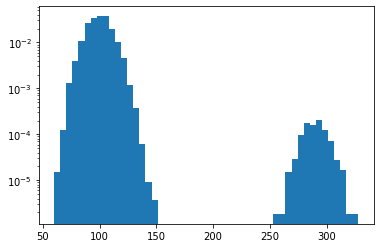

In [32]:
sigma = 8
bgd = np.zeros(100000)
sig = np.ones(500)*stats.poisson.isf(stats.norm.sf(sigma), mu=100)

data = np.append(bgd, sig) + stats.poisson.rvs(mu=100, size=100500)
plt.hist(data, bins=50, density=True)
plt.yscale('log')
plt.show()

This histogram has a remarkably gaussian shape on the left, following a parabolic line downward in the log plot which is characteristic of a gaussian distribution. It also has a similiar shape at 290 on the x axis, which would appear to be the signal is added to the background data. This histogram tells us there is some random background following a relatively gaussian distribution centered around the value 100, with a signal when x = 190.

The observed signal is biased because it was added to the background data set before the random noise; the visible signal above is actually the 'observed signal' of averaging around 290, while the injected signal is 190. The observed signal is essentially the injected signal plus noise (average 100). It is symmetric.

## Problem 3

Make a suite of injected signals, starting at 0$\sigma$ and extending to 34$\sigma$.

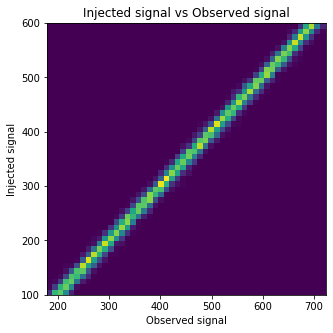

In [86]:
sigma = 8
min_signal = 100 #0 sigma
max_signal = 600 #34 sigma

noise = stats.poisson.rvs(mu=100, size=10000)
injected = np.linspace(min_signal,max_signal,10000)
observed = noise + injected

fig = plt.figure(figsize=(5,5))
h = plt.hist2d(observed, injected, bins=(50,50), density=True)
plt.title('Injected signal vs Observed signal')
plt.ylabel('Injected signal')
plt.xlabel('Observed signal')
plt.show()

The above histogram represents the probability for any injected signal given an observed signal of strength x (x axis). There is a clear band of high probabilities following the line y = x - 100 where y is the strength of the injected signal of strength and x is the strenght of the observed signal.

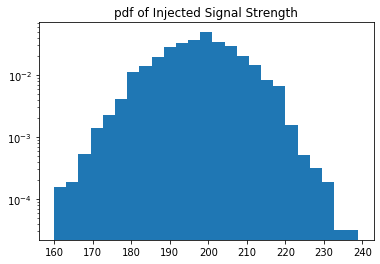

In [102]:
noise = stats.poisson.rvs(mu=100, size=10000)
observed = np.ones(10000)*298 #16 sigma
injected = observed - noise

plt.hist(injected, bins=25, density=True)
plt.yscale('log')
plt.title('pdf of Injected Signal Strength')
plt.show()

For a given observed strength of 296 (16$\sigma$), the above histogram represents the probability of the underlying injected signal strength. The highest probability injected signal strength is just around 200, which is ~100 less than the observed signal strength, and also the average value of the noise. This agrees with common sense which would suggest the most likely value for injected signal strength is the observed signal strength minus the average of the background noise.